# AlertAI - Algorithms 
This notebook is responsible for the development the algorithms that will detect the anomalies in the data.
Last task of the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Supervised Learning

    3.1 Algorithm A

            a. Data preparation for the input

            b. Model Training

            c. Output results

4. Unsupervised Learning

    4.1 Algorithm B

            a. Data preparation for the input

            b. Model Training

            c. Output results

5. Model Export
6. Conclusions and Validation

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [5]:
import keras
from keras import layers
from keras.utils import np_utils, get_file
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, IsolationForest

## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [6]:
data = pd.read_csv("data/raw_data.csv")

X = data[['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure']]
y = data[['sensors.classification']]

print(X.shape)
print(y.shape)

#sklearn para dividir os dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(498, 6)
(498, 1)
(348, 6)
(150, 6)
(348, 1)
(150, 1)


## 3. Supervised Learning
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Algoritmo "SVM (Support Vector Machine)"

#### SVM (Best Kernel)

In [7]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=6, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

for i in range(4):
    model = getClassifier(i)
    model.fit(X_train, y_train.values.ravel())
    y_pred_test = model.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred_test))


Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       134
           1       0.11      1.00      0.19        16

    accuracy                           0.11       150
   macro avg       0.05      0.50      0.10       150
weighted avg       0.01      0.11      0.02       150

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       134
           1       0.00      0.00      0.00        16

    accuracy                           0.89       150
   macro avg       0.45      0.50      0.47       150
weighted avg       0.80      0.89      0.84       150

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       134
           1       0.00      0.00      0.00        16

    accuracy                           0.89       150
   macro avg       0.45      0.50      0.47     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Evaluation: Linear kernel
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       134
           1       1.00      0.81      0.90        16

    accuracy                           0.98       150
   macro avg       0.99      0.91      0.94       150
weighted avg       0.98      0.98      0.98       150



#### SVM Parameter Tuning - GridSearch

In [8]:
#Grid Search
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train.values.ravel())
print("GRID SEARCH")
print(grid.best_estimator_)
grid_pred = grid.predict(X_test)
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))
print(grid.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.4s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=  11.4s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   5.4s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .

[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=  23.8s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   8.4s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  5.9min finished


GRID SEARCH
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[134   0]
 [  3  13]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       134
           1       1.00      0.81      0.90        16

    accuracy                           0.98       150
   macro avg       0.99      0.91      0.94       150
weighted avg       0.98      0.98      0.98       150

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


#### a. Data preparation for input

#### b. Model Trainig

In [9]:
#SVC - Support Vector Classifier class (Scikit-Learn's svm library).
#Polinomial 'poly & degree', Gaussian Kernel 'rbf', Sigmoid Kernel 'sigmoid', Linear 'linear'
model = SVC(kernel = 'linear')
model.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### c. Output results

In [10]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [11]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy:  0.98
Precision:  1.0
Recall: 0.8125
[[134   0]
 [  3  13]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       134
           1       1.00      0.81      0.90        16

    accuracy                           0.98       150
   macro avg       0.99      0.91      0.94       150
weighted avg       0.98      0.98      0.98       150



#### d. Model Saving 

In [12]:
import pickle

#SVM with best result
filename = 'model_saves/svm.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


#GridSearch
filename = 'model_saves/svm_gridsearch.sav'
pickle.dump(grid, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print("Grid Search: ",result)


0.98
Grid Search:  0.98


### 3.2 Algoritmo "Neural Networks"
Nota: Versão muito muito simples e inicial

#### a. Data preparation for input

In [13]:
num_classes = 1 # Number of classes right now (0-Normal,1-smoke)
y_train_nn = np.asarray(y_train)
y_test_nn = np.asarray(y_test)
print(X_train.shape)

(348, 6)


#### b. Model Train and Results

In [14]:
# Model Build
nn = keras.Sequential()

nn.add(layers.Dense(128,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(num_classes,activation='sigmoid'))

# Model Compile
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.build()

# Model Summary
print(nn.summary())

# Model Training 
epochs = 20
batch_size = 16
nn.fit(X_train, y_train_nn, validation_data = (X_test, y_test_nn), epochs = epochs, verbose = 2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________
None
Train on 348 samples, validate on 150 samples
Epoch 1/20
 - 0s - loss: 112.1609 - accuracy: 0.8247 - val_loss: 85.9700 - val_accuracy: 0.1067
Epoch 2/20
 - 0s - loss: 45.2272 - accuracy: 0.8247 - val_loss: 55.6244 - val_accuracy: 0.9067
Epoch 3/20
 - 0s - loss: 54.4486 - accuracy: 0.8994 - val_loss: 34.2551 - val_accuracy: 0.9333
Epoch 4/20
 - 0s - loss: 22.7080 - accuracy: 0.9282 - val_loss: 9.4748 - val_accuracy: 0.5333
Epoch 5/20
 - 0s - loss: 4.5910 - accuracy: 0.9023 - val_loss: 1.5686 - val_accurac

In [15]:
y_preds = nn.predict(X_test)
print(y_preds.round())

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [16]:
print("Metrics - Test data")
print("Accuracy: ", metrics.accuracy_score(y_test, y_preds.round()))
print("Precision: ",metrics.precision_score(y_test, y_preds.round()))
print(confusion_matrix(y_test, y_preds.round()))
print(classification_report(y_test, y_preds.round()))

Metrics - Test data
Accuracy:  0.82
Precision:  0.36585365853658536
[[108  26]
 [  1  15]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89       134
           1       0.37      0.94      0.53        16

    accuracy                           0.82       150
   macro avg       0.68      0.87      0.71       150
weighted avg       0.92      0.82      0.85       150



#### b. Model Train and Results - sklearn

In [45]:
model = MLPClassifier(hidden_layer_sizes=(6,6,6), activation='relu', solver='adam', max_iter=10000)
model.fit(X_train, y_train.values.ravel())

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_test)

print(y_pred_test)

     sensors.classification
386                       0
345                       0
411                       0
132                       0
76                        0
..                      ...
270                       0
406                       0
222                       0
248                       0
198                       0

[150 rows x 1 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [46]:
print("Metrics - Train data")
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
print("Precision: ",metrics.precision_score(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


print("Metrics - Test data")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("Precision: ",metrics.precision_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Metrics - Train data
Accuracy:  0.8764367816091954
Precision:  1.0
[[304   0]
 [ 43   1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       304
           1       1.00      0.02      0.04        44

    accuracy                           0.88       348
   macro avg       0.94      0.51      0.49       348
weighted avg       0.89      0.88      0.82       348

Metrics - Test data
Accuracy:  0.9066666666666666
Precision:  1.0
[[134   0]
 [ 14   2]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       134
           1       1.00      0.12      0.22        16

    accuracy                           0.91       150
   macro avg       0.95      0.56      0.59       150
weighted avg       0.92      0.91      0.87       150



#### d. Model Saving 

In [49]:
import pickle

#Neural Network sklearn
filename = 'model_saves/nn_sklearn.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

#Neural Network implementada
filename = 'model_saves/nn.sav'
pickle.dump(nn, open(filename, 'wb'))

0.9066666666666666


### 3.3 Algoritmo "Naive Bayes"

#### a. Data preparation for input

#### b. Model Trainig

In [24]:
model = GaussianNB()
model.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

#### c. Output results

In [25]:
y_pred_test = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [26]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy: 0.9333333333333333
[[134   0]
 [ 10   6]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       134
           1       1.00      0.38      0.55        16

    accuracy                           0.93       150
   macro avg       0.97      0.69      0.75       150
weighted avg       0.94      0.93      0.92       150



#### d. Model Saving 

In [27]:
import pickle

filename = 'model_saves/naivebayes.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9333333333333333


### 3.4 Algoritmo "Decision Trees/Random Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [28]:
#Utlizando o modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

#Instanciar o modelo com x decision trees
model = RandomForestRegressor(n_estimators = 50, random_state = 0) #random_state: "the results will be the same each time I run the split for reproducible results"

#Treinar o modelo
model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#### c. Output results

In [29]:
#Fazer previsões
y_pred_test = model.predict(X_test)
print(y_pred_test)
print(y_pred_test.round())

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.04 0.   0.   0.
 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.   0.
 0.   1.   0.   0.   0.   0.04 0.   0.   0.   0.   0.04 0.   0.   0.
 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.   0.   0.
 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   1.   1.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   1.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 1.   0.   0.04 0.   0.   1.   0.52 1.   0.   0.   0.02 0.   0.   0.02
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print(confusion_matrix(y_test,y_pred_test.round()))
print(classification_report(y_test,y_pred_test.round()))
print(accuracy_score(y_test, y_pred_test.round()))

Mean Absolute Error: 0.014266666666666667
Mean Squared Error: 0.009394666666666667
Root Mean Squared Error: 0.09692608867929556
[[134   0]
 [  2  14]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       134
           1       1.00      0.88      0.93        16

    accuracy                           0.99       150
   macro avg       0.99      0.94      0.96       150
weighted avg       0.99      0.99      0.99       150

0.9866666666666667


#### d. Model Saving 

In [31]:
import pickle

filename = 'model_saves/randomforest.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9014085820895522


## 4. Unsupervised Learning
Nota: Nestes casos não existe 'classificação' por serem modelos não supervisionados

### 4.1 Algoritmo "K-means clustering"

#### a. Data preparation for input

#### b. Model Trainig

In [32]:
n_clusters = 2

model = KMeans(algorithm = 'auto', init = 'k-means++', max_iter = 500, n_init= 10, n_clusters = n_clusters, verbose = 0) #Para já vou colocar 2, de existência e não existência de fumo
model.fit(X_train)
y_labels_train = model.labels_

#### c. Output results

In [33]:
y_labels_test = model.predict(X_test)

print(y_labels_test)

[1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0
 1 0]


[1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1]
[[5.54913793e+00 8.47327586e+00 1.66742214e+01 5.33827069e+04
  5.16297330e+01 9.74577436e+02]
 [6.17068966e+01 1.15249569e+02 2.37566938e+01 2.81616207e+04
  3.89071714e+01 1.00789298e+03]]


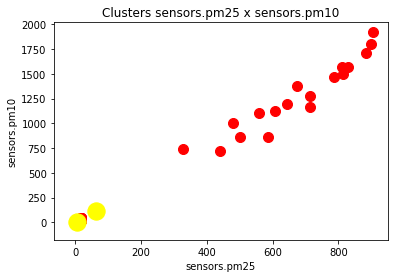

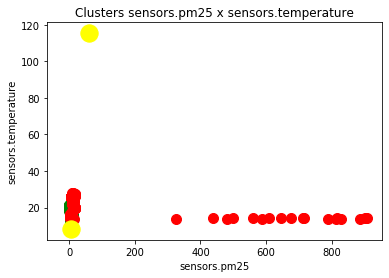

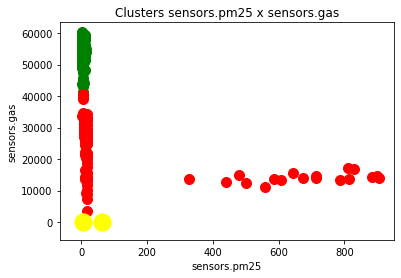

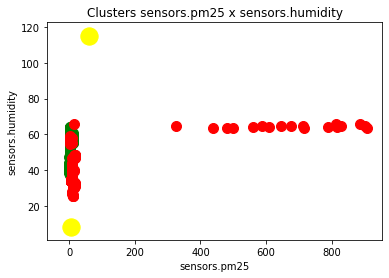

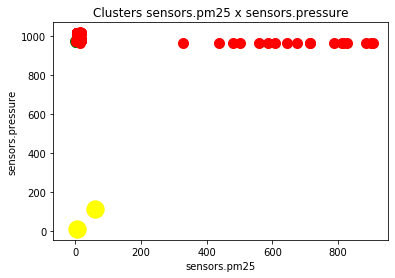

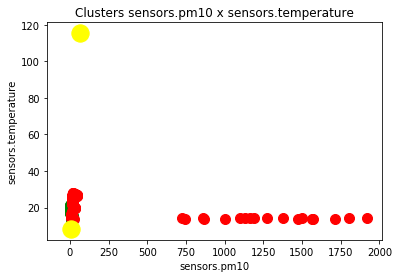

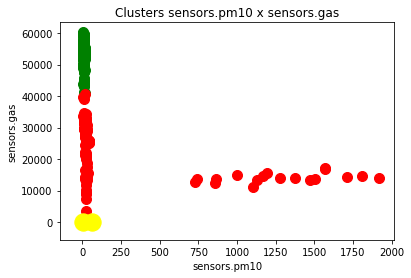

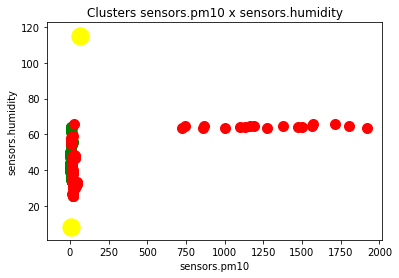

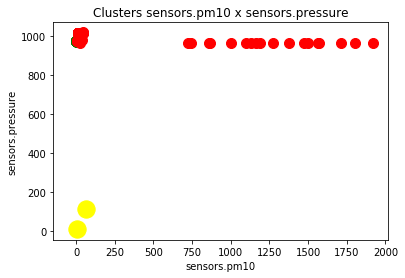

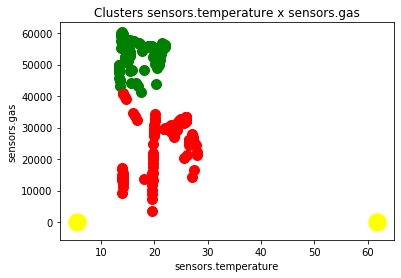

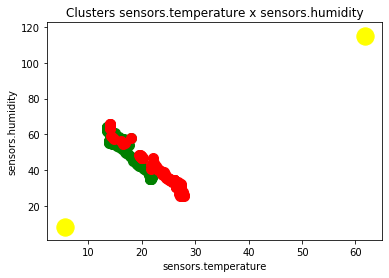

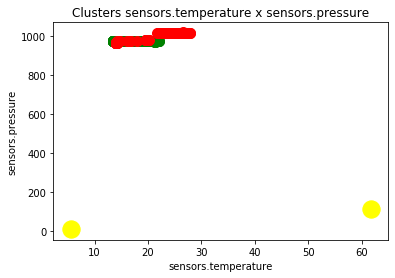

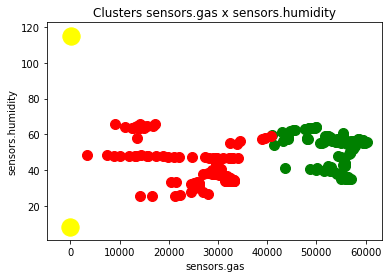

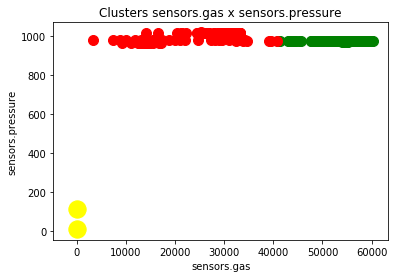

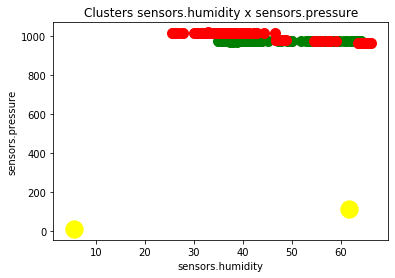

In [34]:
print(model.labels_) #prever a que cluster cada ponto pertence
print(model.cluster_centers_) #para ver onde é o centro de cada cluster

#Labels
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if( c1 >= c2):
            ;
        else:
            plt.scatter(X_train[model.labels_ == 0][col1], X_train[model.labels_ == 0][col2], s = 100, c = 'green', label = 'Cluster 0')
            plt.scatter(X_train[model.labels_ == 1][col1], X_train[model.labels_ == 1][col2], s = 100, c = 'red', label = 'Cluster 1')
            plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
            plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

#### d. Model Saving 

In [35]:
import pickle

filename = 'model_saves/kmeans.sav'
pickle.dump(model, open(filename, 'wb'))

### 4.2 Algoritmo "Local Outlier factor"

#### a. Data preparation for input

#### b. Model Trainig

In [36]:
n_neighbors = 20 #no sklearn diz que 20 é no geral um valor bom, mas podemos otimizar depois
metric = 'manhattan' #Euclid, Minkowski, Manhattan

model = LocalOutlierFactor(n_neighbors = n_neighbors, metric = metric, contamination = 0.1)
y_pred = model.fit_predict(X_train)
X_scores = model.negative_outlier_factor_ #Negative LOF score

#### c. Output results

[-0.95808357 -2.10832211 -1.01886886 -0.95521928 -1.38777058 -1.00003395
 -0.99895071 -1.09562236 -1.23053174 -0.97416297 -1.04600405 -2.10996324
 -1.00575426 -1.52214766 -1.04311054 -0.99486334 -1.17119884 -1.03857843
 -1.25568673 -0.9857817  -0.97416297 -1.06829438 -1.34122937 -1.77204591
 -1.19569913 -1.04365494 -1.06075055 -1.05973002 -1.01360413 -1.3303645
 -0.94934693 -1.01519076 -1.24715763 -0.98507305 -1.46650754 -2.13754828
 -1.03976363 -1.27797485 -1.01668761 -0.99363617 -1.00120958 -0.98307215
 -1.4803617  -1.20963067 -1.99535501 -1.15046771 -1.12169375 -1.00674597
 -1.04125915 -1.31221514 -1.0024379  -1.06807307 -1.11644857 -1.06803967
 -1.02244131 -1.63135224 -1.08919967 -1.11282777 -9.59964348 -1.14204554
 -0.97522656 -4.07960888 -1.34175255 -0.97466991 -1.06052679 -1.29698048
 -1.5398991  -1.10646051 -0.9999882  -1.25571629 -1.04197554 -1.01031108
 -0.9820002  -1.33566323 -1.32564246 -0.95953622 -1.02718868 -1.00168261
 -0.95744037 -1.03927555 -1.12743829 -0.98602466 -1.

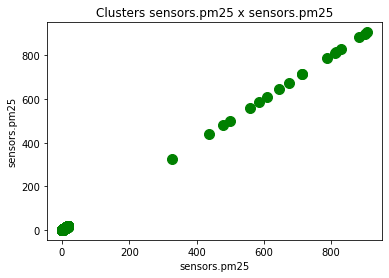

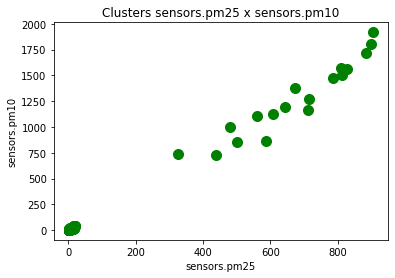

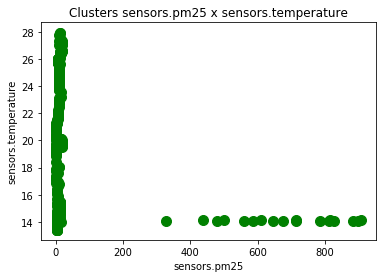

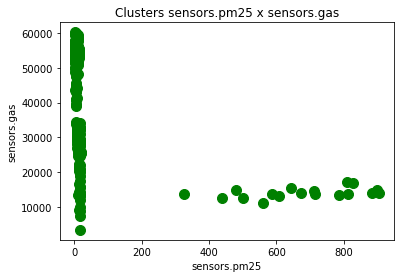

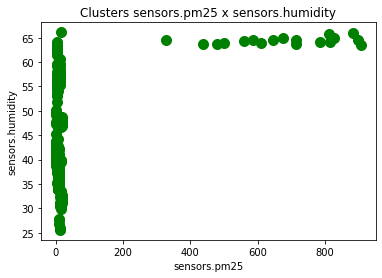

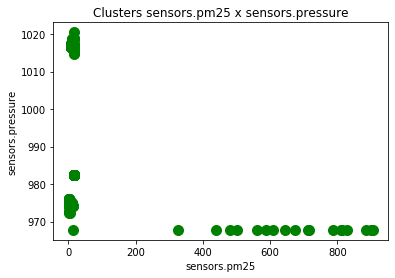

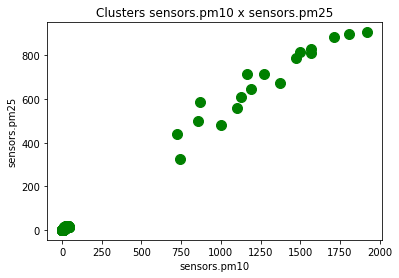

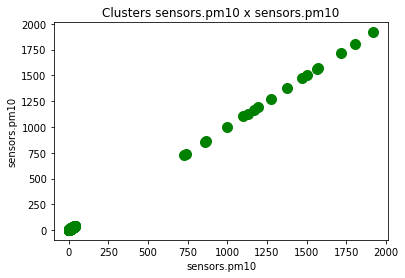

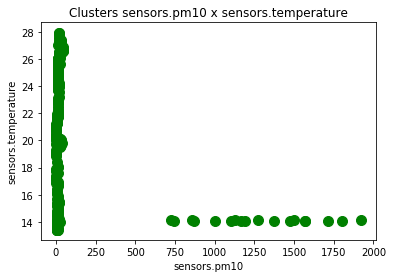

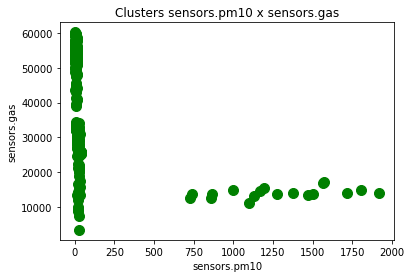

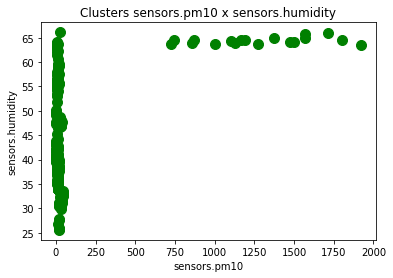

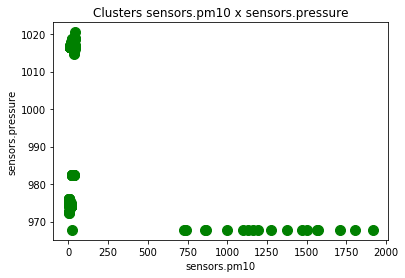

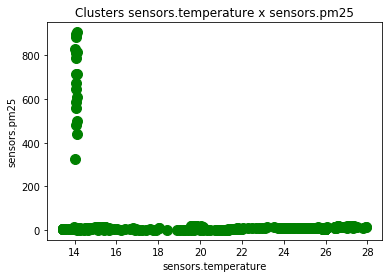

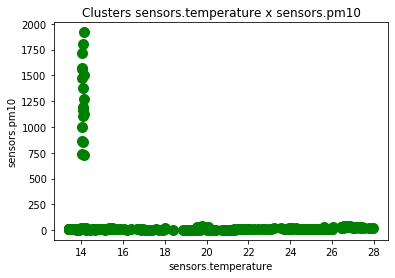

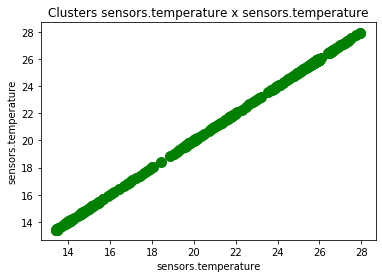

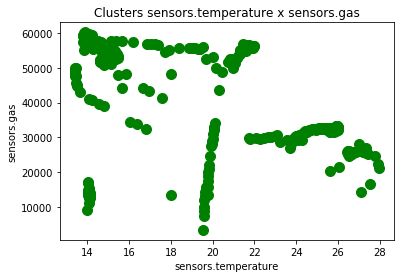

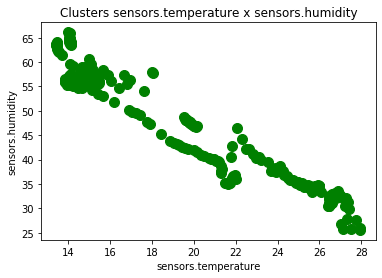

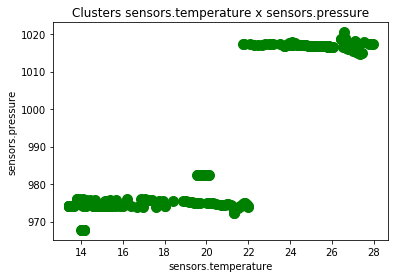

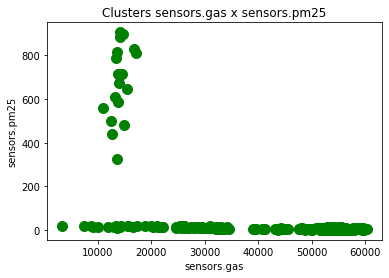

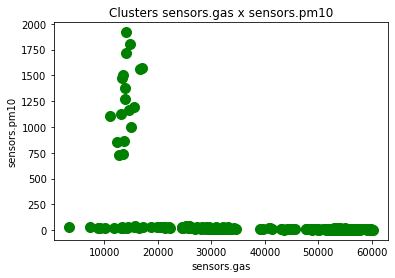

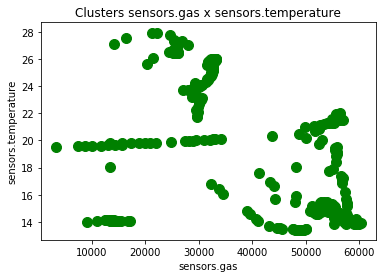

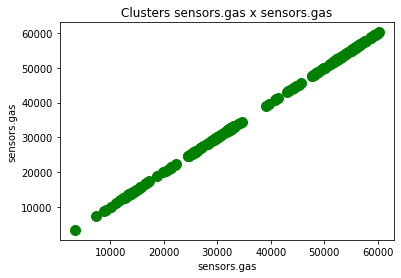

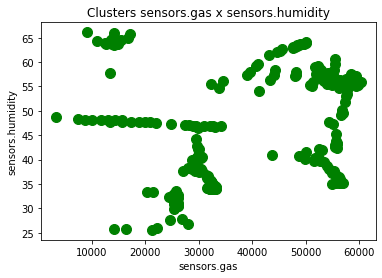

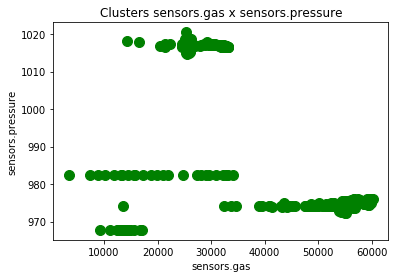

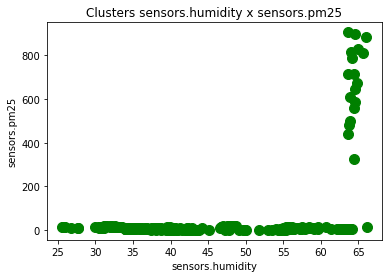

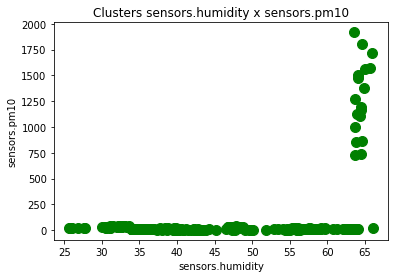

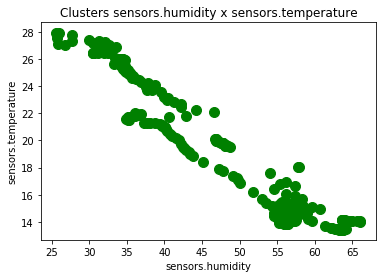

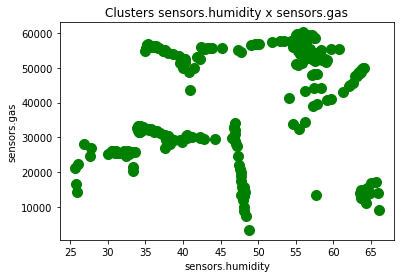

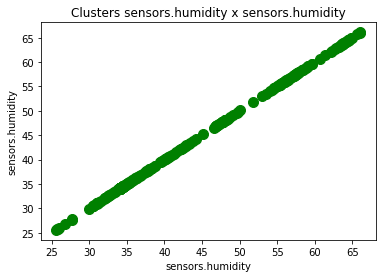

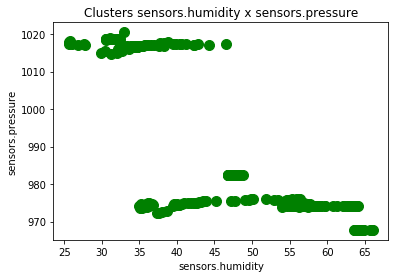

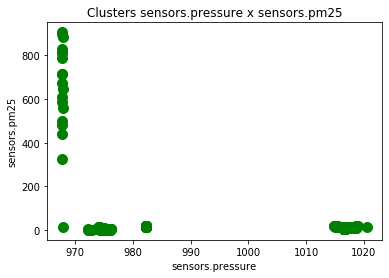

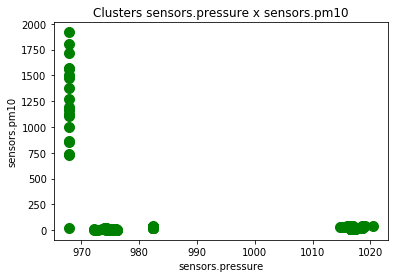

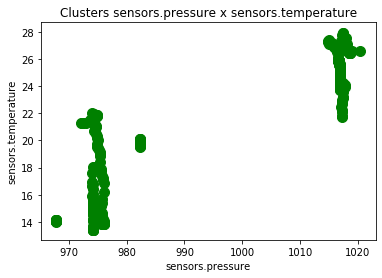

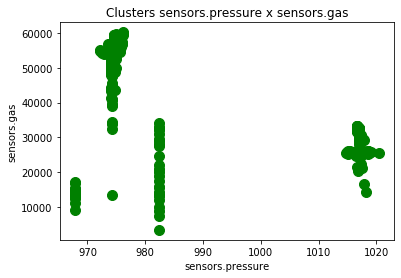

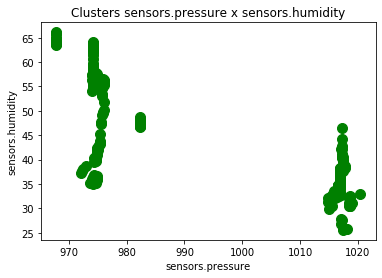

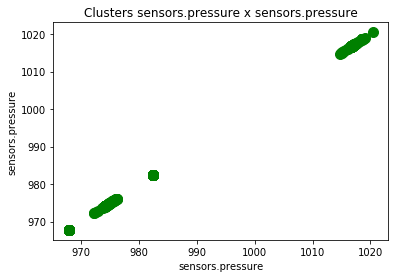

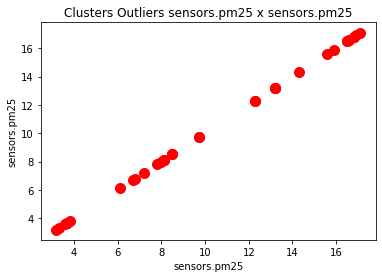

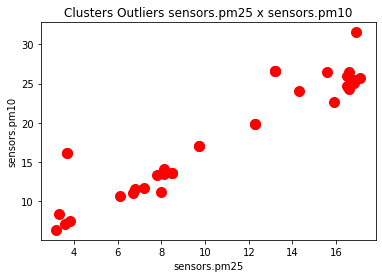

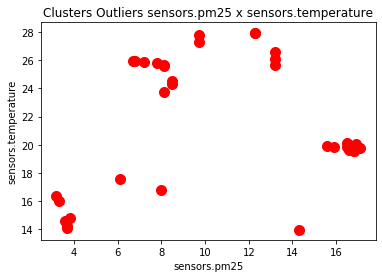

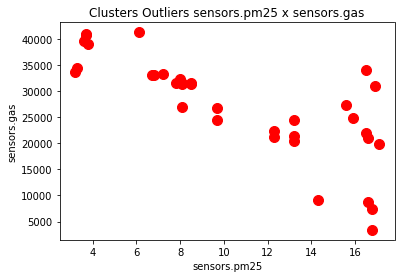

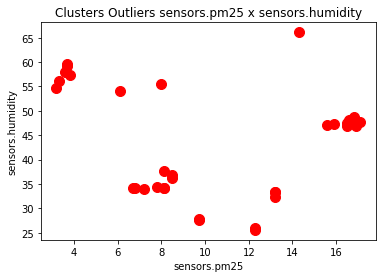

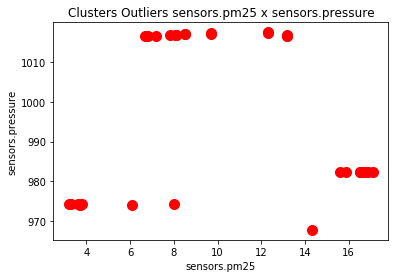

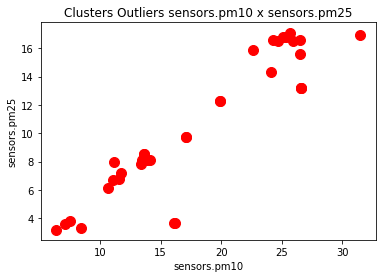

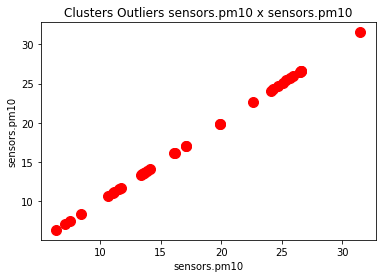

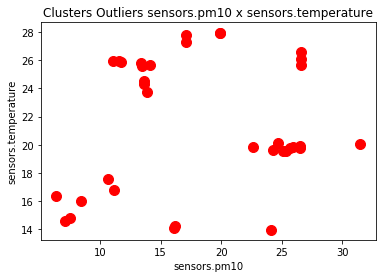

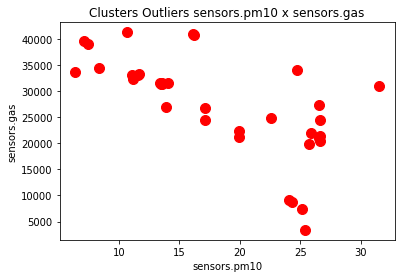

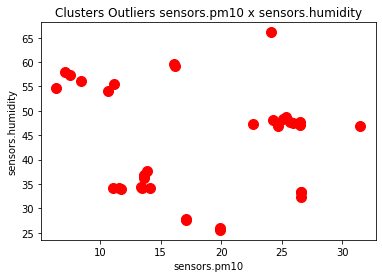

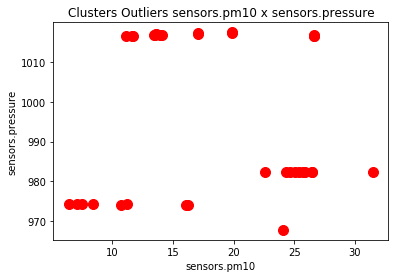

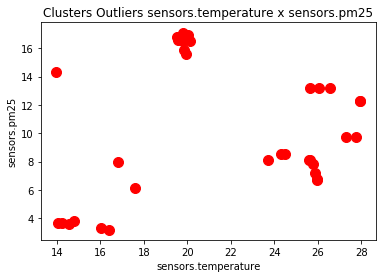

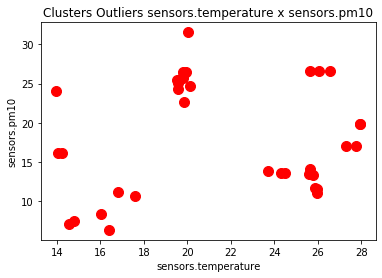

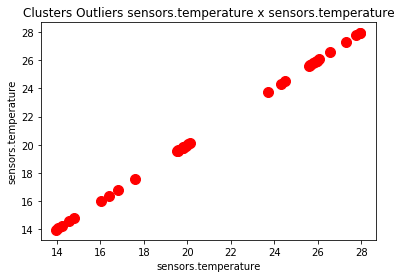

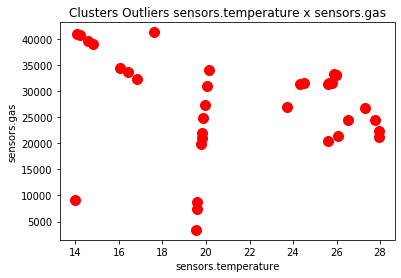

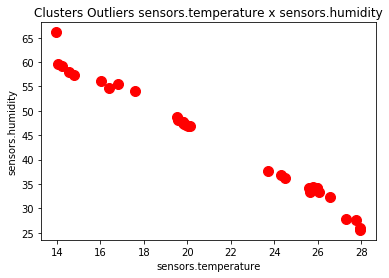

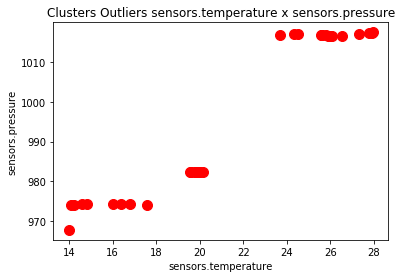

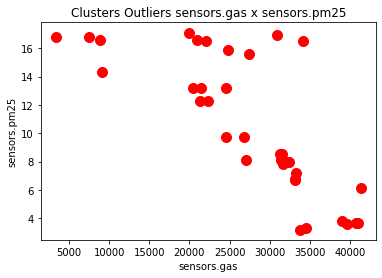

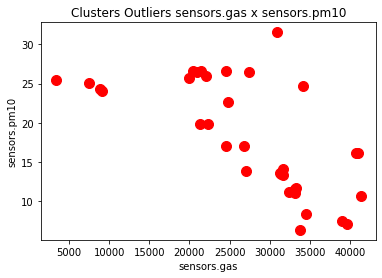

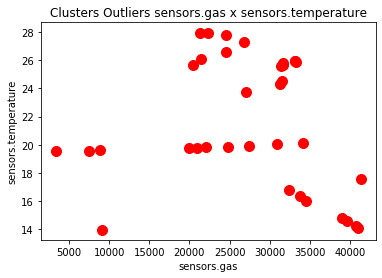

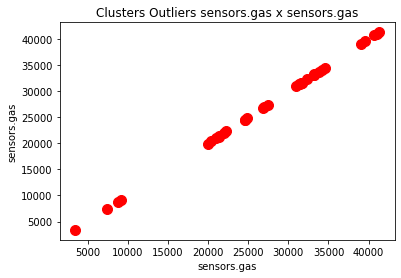

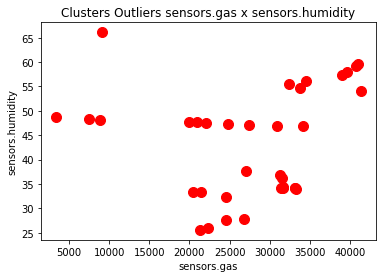

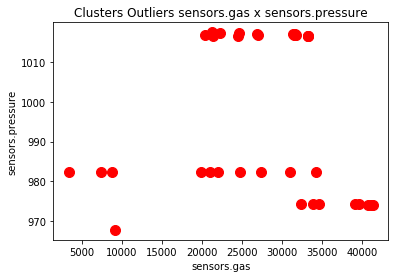

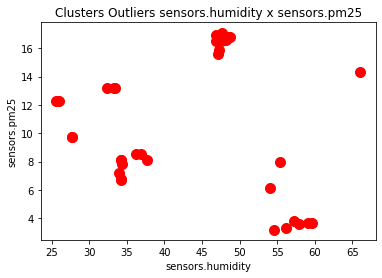

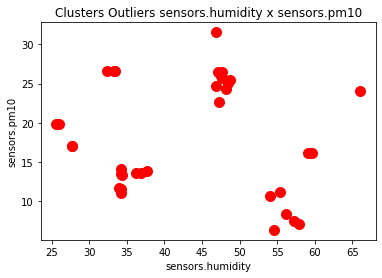

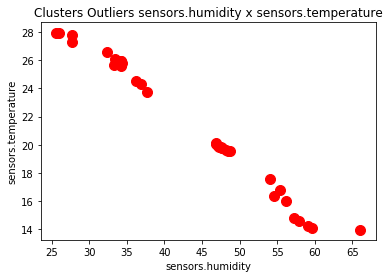

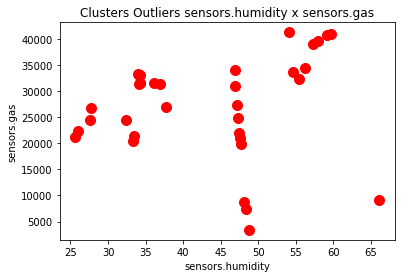

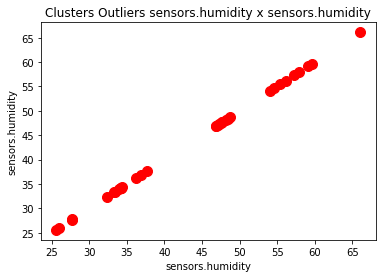

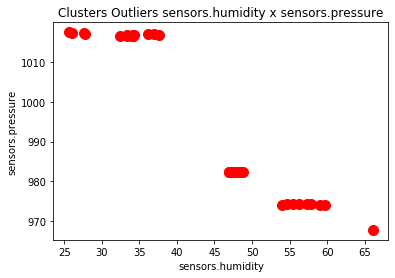

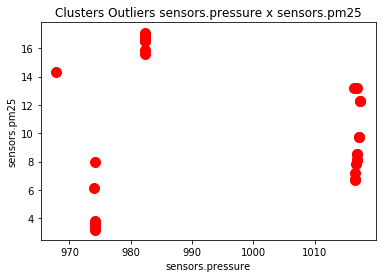

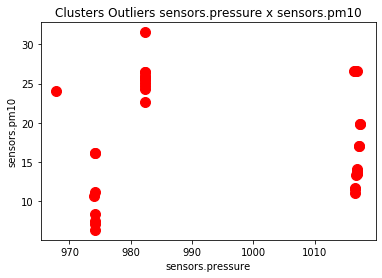

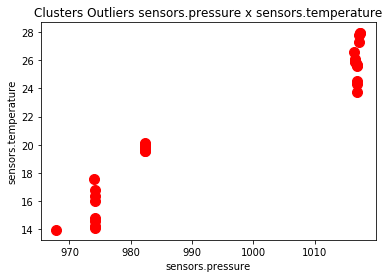

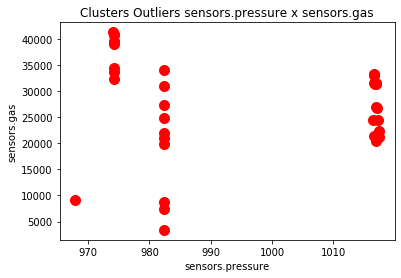

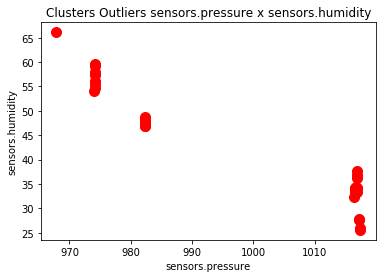

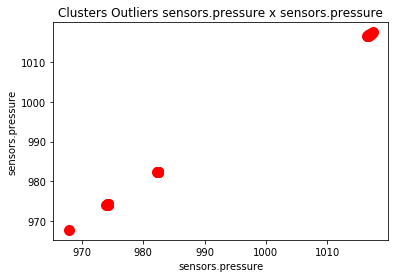

In [37]:
#Notas:
#LOF(k) ~ 1 means Similar density as neighbors.
#LOF(k) < 1 means Higher density than neighbors (Inlier/not an outlier).
#LOF(k) > 1 means Lower density than neighbors (Outlier)

print(X_scores)
print(y_pred) #1 - inlier / -1 outlier

#Filtro dos outliers (valores negativos)
outlier_index = np.where(y_pred == -1)
outlier_values = X_train.iloc[outlier_index]
print("----------------------------------------")
print(outlier_index)
print("----------------------------------------")

#Plot dos dados
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(X_train[col1], X_train[col2], s = 100, c = 'green', label = 'Cluster dados')
        plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

#Plot Outliers Values
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(outlier_values[col1],outlier_values[col2], s = 100, c = 'r', label = 'Cluster Outliers')
        plt.title('Clusters Outliers ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

#### d. Model Saving 

In [38]:
import pickle

filename = 'model_saves/lof.sav'
pickle.dump(model, open(filename, 'wb'))

### 4.3 Algoritmo "Isolation Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [39]:
model = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 6, behaviour = 'new')
#n_estimatores = 100 por default; max_features = "It is the number of features to draw from the total features to train each base estimator or tree"
model.fit(X_train)

scores = model.decision_function(X_train)

#### c. Output results

In [40]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_pred_train) #anomalias = -1
print(y_pred_test)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1

(array([ 15,  26,  45,  46,  50,  57,  63,  66,  67,  71,  81,  84,  87,
        99, 111, 122, 138, 154, 161, 185, 219, 228, 238, 244, 274, 275,
       277, 280, 288, 320, 324, 326, 337, 346, 347]),)
Accuracy: 0.8733333333333333


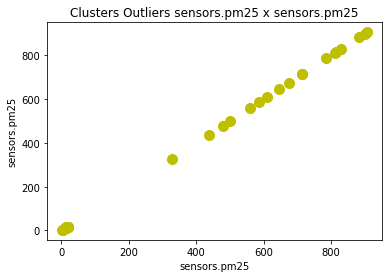

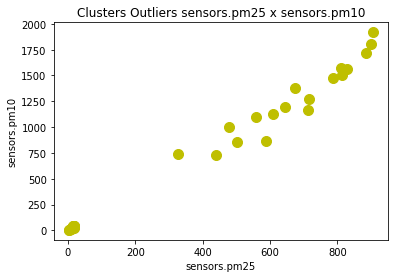

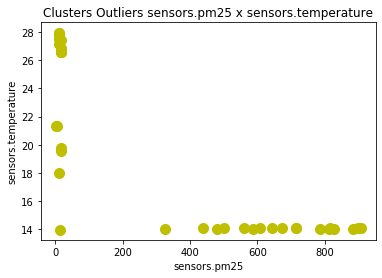

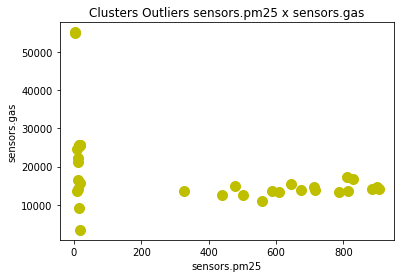

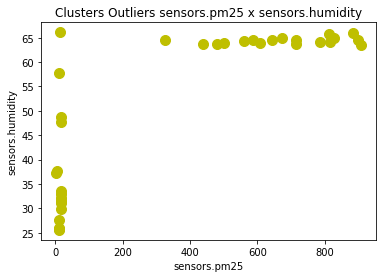

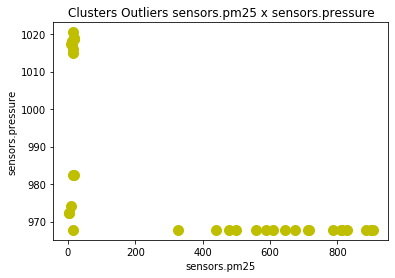

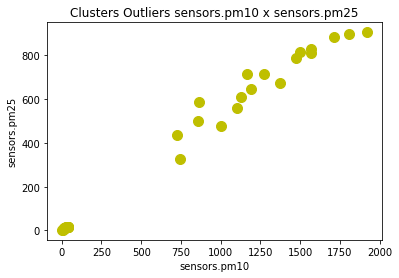

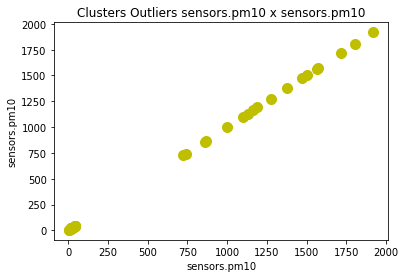

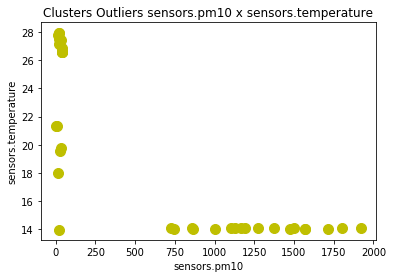

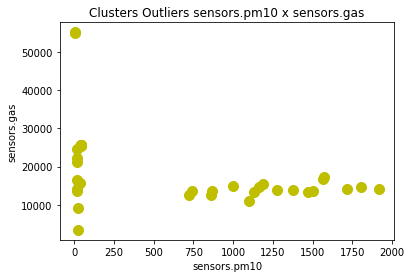

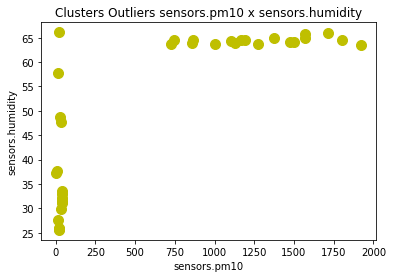

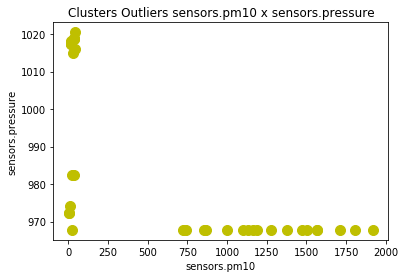

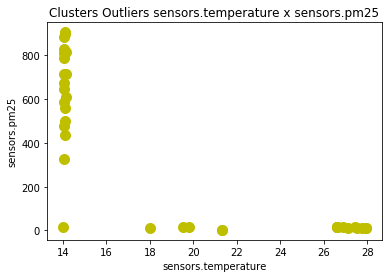

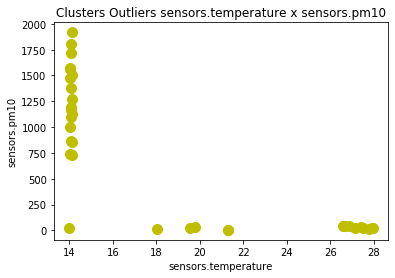

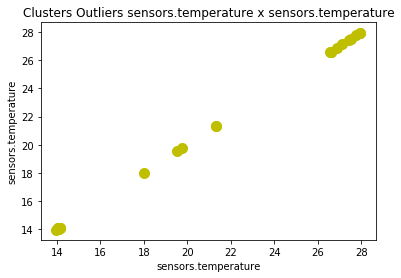

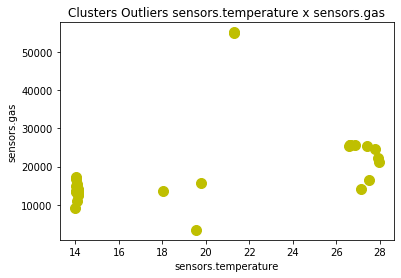

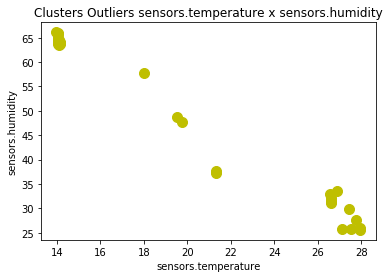

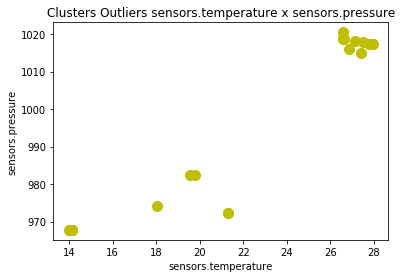

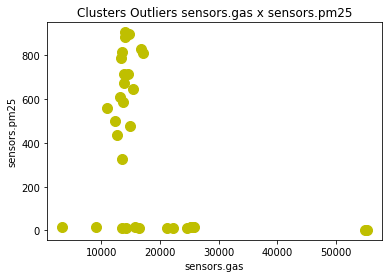

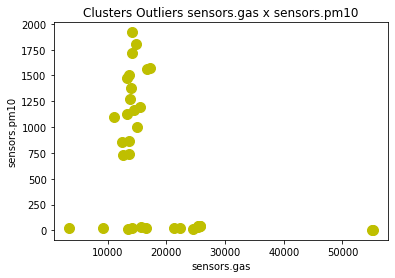

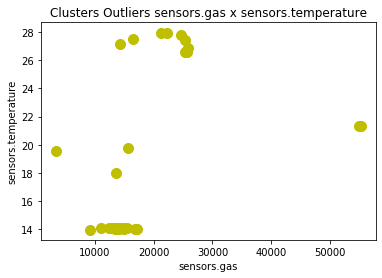

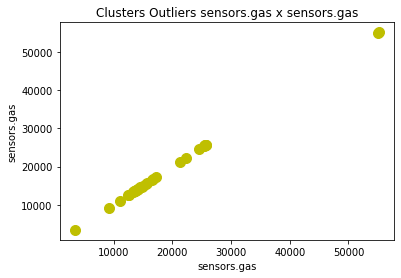

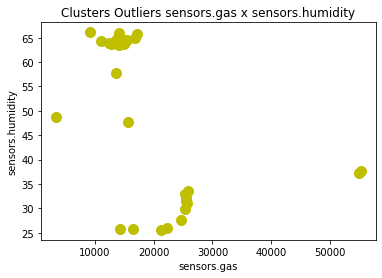

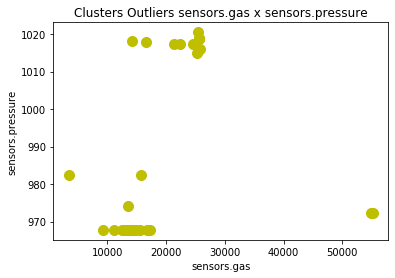

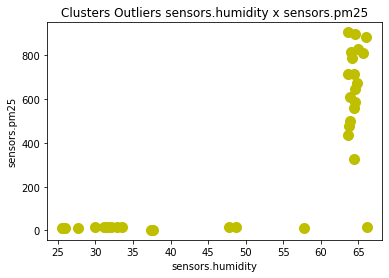

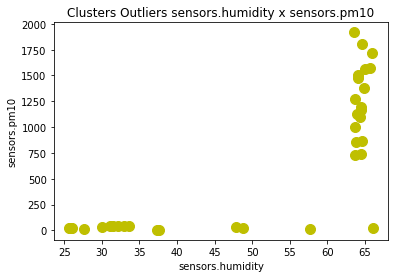

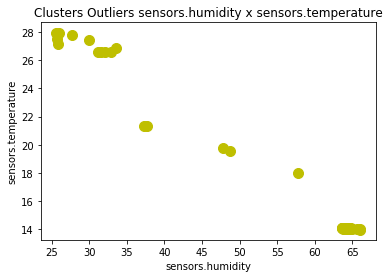

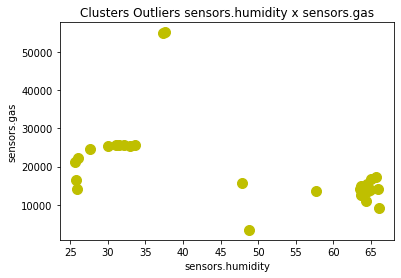

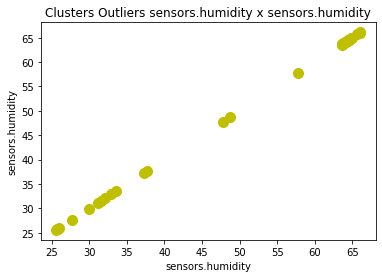

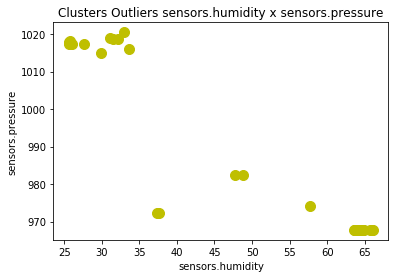

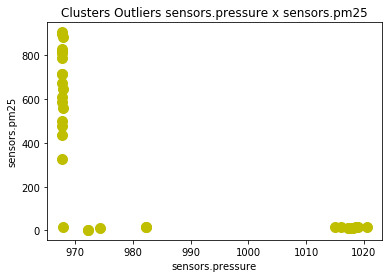

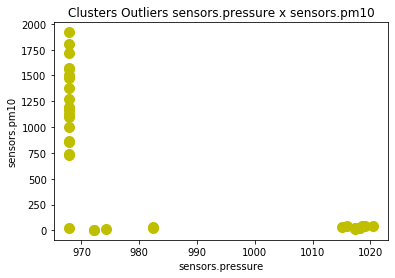

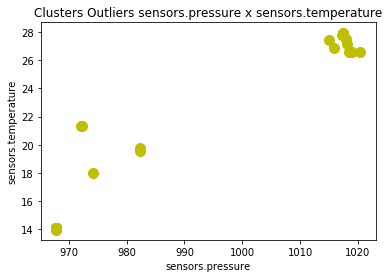

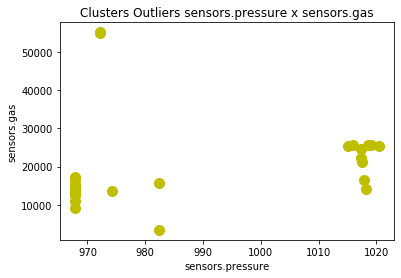

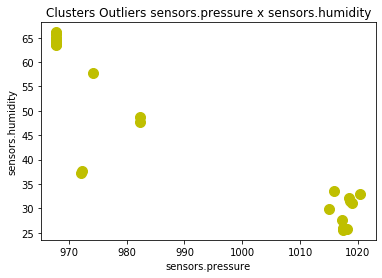

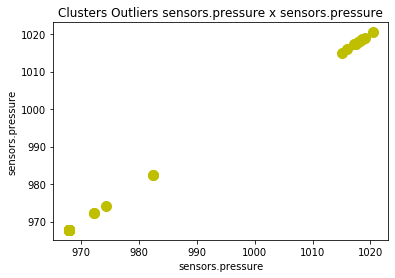

In [41]:
#Anomalias
outlier_index = np.where(y_pred_train == -1)
outlier_values = X_train.iloc[outlier_index]

print(outlier_index)

print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

#Plot Outliers Values
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(outlier_values[col1], outlier_values[col2], s = 100, c = 'y', label = 'Cluster Outliers')
        plt.title('Clusters Outliers ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

#### d. Model Saving 

In [42]:
import pickle

filename = 'model_saves/isolationforest.sav'
pickle.dump(model, open(filename, 'wb'))

## 5. Model Exportation 

## 5. Conclusions and Validation
Conclusion and validations belongs to this section